<a href="https://colab.research.google.com/github/CallumPaton/analysing-most-competitve-f1-season/blob/main/F1_data_analysis_changes_to_championshp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/F1-data-analysis'
driver_standings = pd.read_csv(f'{file_path}/driver_standings.csv')
races = pd.read_csv(f'{file_path}/races.csv')
drivers = pd.read_csv(f'{file_path}/drivers.csv')

In [ ]:
driver_standings = driver_standings.merge(races[['raceId','year']], on='raceId')

In [ ]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year
0,1,18,1,10.0,1,1,1,2008
1,2,18,2,8.0,2,2,0,2008
2,3,18,3,6.0,3,3,0,2008
3,4,18,4,5.0,4,4,0,2008
4,5,18,5,4.0,5,5,0,2008


In [ ]:
standings = driver_standings[['driverId','raceId','year','position']]

In [ ]:
def calculate_showdown_metric(df):
  showdown_metric = {}

  unique_years = df['year'].unique()
  print(unique_years)

  for year in unique_years:

    season_df = df[df['year'] == year]

    # Find the races with the largest and second-largest raceId values in the season
    # Get unique values from the column
    unique_values = season_df['raceId'].unique()

    # Sort unique values in descending order
    sorted_unique_values = sorted(unique_values, reverse=True)

    # Access the second-largest unique value
    third_last_raceId = sorted_unique_values[2]
    second_last_raceId = sorted_unique_values[1]
    last_raceId = sorted_unique_values[0]

    final_race_data = season_df[season_df['raceId'] == last_raceId]
    penultimate_race_data = season_df[season_df['raceId'] == second_last_raceId]
    thrid_race_data = season_df[season_df['raceId'] == third_last_raceId]

    # Merge the two DataFrames based on the 'driverId' column
    merged_df = pd.merge(thrid_race_data, penultimate_race_data, on='driverId')
    merged_df = pd.merge(merged_df, final_race_data, on='driverId')
    merged_df = merged_df[['driverId','position_x','position_y','position']]


    # Calculate absolute position changes
    merged_df['change_xy'] = abs(merged_df['position_x'] - merged_df['position_y'])
    merged_df['change_yz'] = abs(merged_df['position_y'] - merged_df['position'])

    def calculate_score(row):
      score = 0
      if row['position_x'] != row['position_y']:
          score += weights.get(row['position_y'], weights['Other'])
      if row['position_y'] != row['position']:
          score += weights.get(row['position'], weights['Other'])
      return score

    merged_df['score'] = merged_df.apply(calculate_score, axis=1)

    # Display the result with driverId and score columns
    result_df = merged_df[['driverId', 'score']]

    showdown_metric[year] = result_df['score'].sum()

  return showdown_metric



In [ ]:
weights = {
    1: 5,
    2: 4,
    3: 3,
    4: 2,
    5: 1,
    6: 0.5,
    7: 0.5,
    8: 0.5,
    9: 0.5,
    10:0.5,
    11:0.25,
    12:0.25,
    13:0.25,
    14:0.25,
    15:0.25,
    16:0.25,
    17:0.25,
    18:0.25,
    19:0.25,
    20:0.25,
    'Other': 0
}

In [ ]:
standings = standings[(standings['year'] >= 1990) & (standings['year'] < 2023)]

In [ ]:
x = calculate_showdown_metric(standings)

[2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 2017 1991 1990 2009 2010 2011 2012 2013 2014 2015 2016
 2018 2019 2020 2021 2022]
     driverId  raceId  year  position
354         1      35  2008         1
355         2      35  2008         6
356         3      35  2008        13
357         4      35  2008         5
358         5      35  2008         7
359         6      35  2008        15
360         7      35  2008        17
361         8      35  2008         3
362         9      35  2008         4
363        15      35  2008         9
364        17      35  2008        11
365        14      35  2008        16
366        18      35  2008        18
367        12      35  2008        12
368        21      35  2008        19
369        22      35  2008        14
370        19      35  2008        22
371        11      35  2008        21
372        13      35  2008         2
373        10      35  2008        10
374        16      35  2008      

<ipython-input-16-157458210d95>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


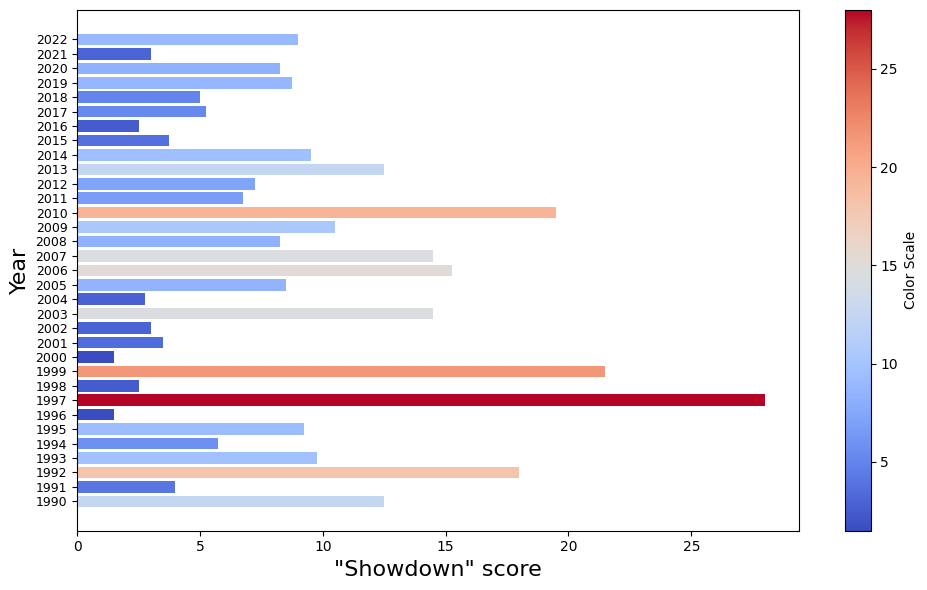

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
years = list(x.keys())
values = list(x.values())

# Define the colormap (e.g., 'coolwarm' for a blue to red gradient)
cmap = plt.get_cmap('coolwarm')

# Normalize the values to map to the colormap
norm = plt.Normalize(min(values), max(values))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bars with the colormap
bars = ax.barh(years, values, color=cmap(norm(values)))

# Set labels and title
ax.set_xlabel('"Showdown" score', fontsize=16)
ax.set_ylabel('Year',fontsize=16)

# Tilt the year labels
ax.set_yticks(years)
ax.set_yticklabels(years, fontsize=9)  # Tilted and larger font size for year labels


# Add a colorbar to indicate the color scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Color Scale')

plt.tight_layout()
plt.show()